In [34]:
import sys
sys.executable

'C:\\Users\\hunte\\Anaconda3\\python.exe'

In [35]:
import numpy as np

In [36]:
import matplotlib.pyplot as plt

In [37]:
def sigma(x):
    return 1/(1+np.exp(-x))

In [38]:
print(sigma(-1000))

0.0


In [39]:
def sigma_(x):
    if (x>0):
        return 1/(1+np.exp(-x))
    return np.exp(x)/(1+np.exp(x))

In [40]:
x = np.array([1, 2])
#y = sigma_(x)
#y

In [41]:
sigma_vect = np.vectorize(sigma_)
sigma_vect(x)

array([0.73105858, 0.88079708])

In [42]:
def softmax(x):
    max_elem = np.max(x, axis = 0)
    print(max_elem.shape)
    y = x - max_elem
    y = np.exp(y)
    print(y.shape)
    print(y)
    sums = np.sum(y, axis = 0)
    print(sums.shape)
    print(sums)
    return y / sums

In [43]:
x = np.random.randn(3, 4)
print(x)
print(softmax(x))

[[ 0.28854013 -1.18381158  0.04659149  1.73891828]
 [-1.00144772  1.25726623 -2.62455694  0.60222059]
 [ 0.46212377  0.54377148 -1.30784034 -0.38254973]]
(4,)
(3, 4)
[[0.84064684 0.08706696 1.         1.        ]
 [0.23140833 1.         0.06917274 0.32087691]
 [1.         0.48992902 0.25809389 0.11985555]]
(4,)
[2.07205517 1.57699598 1.32726663 1.44073246]
[[0.40570679 0.05521064 0.75342812 0.69409139]
 [0.11168058 0.63411702 0.05211669 0.2227179 ]
 [0.48261263 0.31067233 0.1944552  0.08319071]]


In [44]:
C = 4
N_class = 20

centers = np.array([[-1, 0], [0, -1], [1, 0], [0, 1]]).T
X = np.random.randn(2, C, N_class)*0.2 + centers.reshape(2, C, 1)
X = X.reshape(2, -1)
y_label = np.zeros((C, N_class))
y_label[:, :] = np.arange(C).reshape(-1, 1)
y_label = y_label.reshape(-1)

In [45]:
print(X.shape)

(2, 80)


In [46]:
print(y_label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.]


In [47]:
def plotPoints(X, y_label):
    colors = {0: [1,0,0], 1: [0,1,0], 2: [0,0,1], 3: [1,1,0]}
    points_colors = [colors[y_label[i]] for i in range(y_label.size)]
    plt.scatter(X[0], X[1], c = points_colors)
    plt.show()
    print(points_colors)

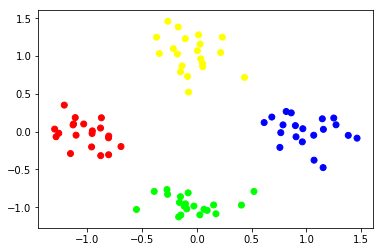

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0]]


In [48]:
plotPoints(X, y_label)

In [49]:
def getlinearfeatures(X):
    return np.vstack((np.ones(X.shape[1]), X))

In [50]:
X_train = getlinearfeatures(X)

In [51]:
def one_hot_encoding(y_label):
    C = int(y_label.max() + 1)
    enc = np.zeros((C, y_label.size))
    enc[y_label.astype(int), np.arange(y_label.size)] = 1
    return enc

In [52]:
y_l = np.array([1, 2, 3, 0, 2, 3])
print(one_hot_encoding(y_l))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]]


In [53]:
def train(X_train, y_label, iters = 10, alpha = 0.1):
    y = one_hot_encoding(y_label)
    c = y.shape[0]
    Nfeatures = X_train.shape[0]
    Nsamples = X_train.shape[1]
    W = np.random.randn(C, Nfeatures)
    for i in range(iters):
        z = softmax(W @ X_train)
        delta = z - y
        gradW = delta @ X_train.T
        W = W - alpha * gradW
    return W

In [54]:
W_opt = train(X_train, y_label)


(80,)
(4, 80)
[[0.66142047 0.50241696 0.45951417 0.72995814 0.6211787  0.60009727
  0.74389193 0.58595111 0.67042646 0.61667646 0.588225   0.45240642
  0.64912077 0.57414733 0.82665176 0.55815826 0.45125211 0.67553862
  0.57927471 0.51720799 0.2582711  0.2637445  0.22406004 0.21444524
  0.2940951  0.28040398 0.24192864 0.29667144 0.30456103 0.23974624
  0.25951599 0.2201152  0.2302746  0.31877516 0.28610968 0.24828516
  0.23902652 0.25607187 0.22844514 0.25045095 0.70761462 0.75878853
  0.70267197 0.6783372  0.78584574 0.46215371 0.76548362 0.72149597
  0.86294283 0.89621372 0.92640504 0.70040383 0.87873076 0.50584143
  0.82103974 0.78550717 0.79752628 0.93957701 0.6379149  0.58211268
  1.         0.94982154 1.         1.         1.         0.98696007
  1.         0.96969063 0.92294148 0.99192121 0.89445324 0.89238064
  0.98488424 0.91936135 1.         0.94187725 0.95776606 1.
  0.99116007 1.        ]
 [0.12024318 0.04968325 0.03388176 0.15290062 0.08620415 0.07892557
  0.12793252 0.09

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.13924469e-02 4.28077157e-03 1.11672000e-02 2.11766555e-02
  1.79863938e-01 5.51600003e-02 1.28200677e-02 5.10870543e-02
  1.26574602e-01 2.38428411e-02 4.26720973e-02 2.15413897e-02
  6.72499190e-03 5.49831447e-03 9.73085819e-02 3.01543847e-02
  1.08201523e-02 3.21721302e-02 1.34283589e-01 2.14614640e-02
  2.57122832e-03 5.59687123e-04 2.63222505e-04 8.95396355e-04
  9.36412857e-04 1.37406355e-04 1.34707337e-04 2.41041211e-05
  4.78282316e-03 6.57011275e-05 1.24716981e-03 1.31193853e-05
  1.45164051e-04 2.57257360e-04 5.62316719e-05 2.20717977e-03
  8.13977244e-03 1.77080349e-03 5.79521243e-04 2.73523768e-03
  7.74510445e-02 1.27533516e-02 3.32914022e-03 1.15559595e-02
  2.0597

In [56]:
print(W_opt)

[[ 0.17858598 -3.96325205 -0.16130017]
 [ 0.35723888 -0.02059366 -4.10410526]
 [ 0.33798404  3.8228151  -0.16205854]
 [ 0.31135576 -0.11567165  3.70420093]]


In [57]:
def predict(xx, yy, W_opt):
    x_1 = xx.reshape(-1)
    y_1 = yy.reshape(-1)
    X = getlinearfeatures(np.vstack((x_1, y_1)))
    y = np.argmax(W_opt @ X, axis = 0)
    return y.reshape(xx.shape)


 #def getlinearfeatures(X):
    #return np.vstack((np.ones(X.shape[1]), X))   

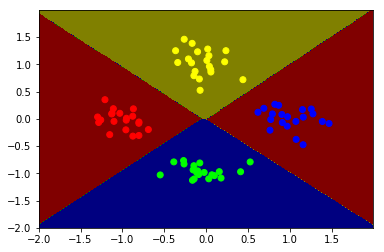

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0]]


In [71]:
x = np.arange(-2, 2, 0.01)
y = np.arange(-2, 2, 0.01)
xx, yy = np.meshgrid(x, y)
colors = {0: [0.5, 0, 0], 1: [0, 0.5, 0], 2: [0, 0, 0.5], 3: [0.5, 0.5, 0]}
labels = predict(xx, yy, W_opt)

plt.contourf(x, y, labels,  colors = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.5], [0.5, 0.5, 0]])
plotPoints(X, y_label)

In [62]:
print(yy)
print(yy.shape)
#print(y)
#print(yy.shape)

[[-2.   -2.   -2.   ... -2.   -2.   -2.  ]
 [-1.99 -1.99 -1.99 ... -1.99 -1.99 -1.99]
 [-1.98 -1.98 -1.98 ... -1.98 -1.98 -1.98]
 ...
 [ 1.97  1.97  1.97 ...  1.97  1.97  1.97]
 [ 1.98  1.98  1.98 ...  1.98  1.98  1.98]
 [ 1.99  1.99  1.99 ...  1.99  1.99  1.99]]
(400, 400)
